<a href="https://colab.research.google.com/github/kkamal11/Machine-Learning__MLP/blob/main/Case_Study_1_Sentiment_Analysis_using_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
from textblob import TextBlob

In [ ]:
testimonial = TextBlob("The food was very good.")
testimonial.sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [ ]:
testimonial = TextBlob("The food was very bad.")
testimonial.sentiment

Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)

In [ ]:
testimonial = TextBlob("The food was bad.")
testimonial.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [ ]:
testimonial = TextBlob("I do not know about the food.")
testimonial.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

---

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/sentiment_analysis_data.csv')

In [ ]:
df.Sentence[0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [ ]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.shape

(5842, 2)

In [ ]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
X = df['Sentence']
y = df['Sentiment']

In [ ]:
X

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object

In [ ]:
print(y.unique(),y.nunique())

['positive' 'negative' 'neutral'] 3


In [ ]:
y.value_counts()

#we will see that the data is imbalanced

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

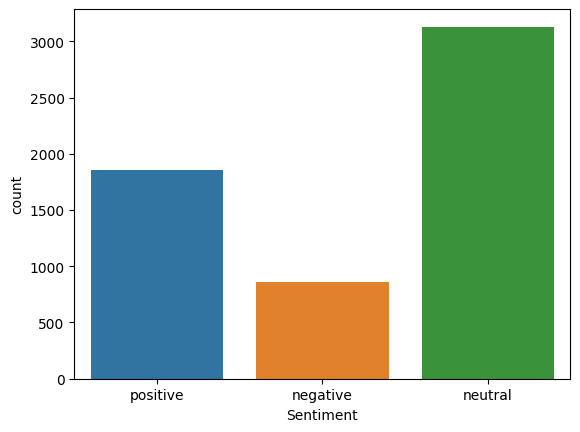

In [ ]:
sns.countplot(x=y, orient="h");

In [ ]:
data_positive = X[df['Sentiment'] == 'positive']
data_negative = X[df['Sentiment'] == 'negative']
data_neutral = X[df['Sentiment'] == 'neutral']

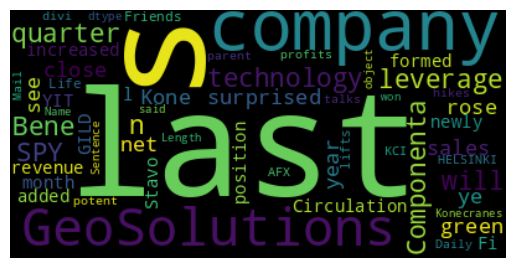

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(data_positive))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

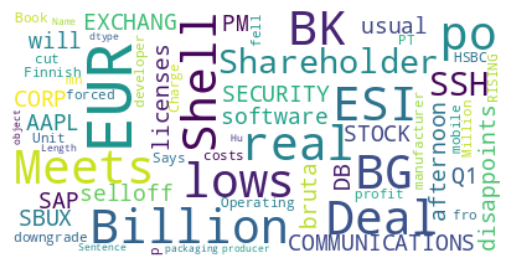

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(data_negative))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

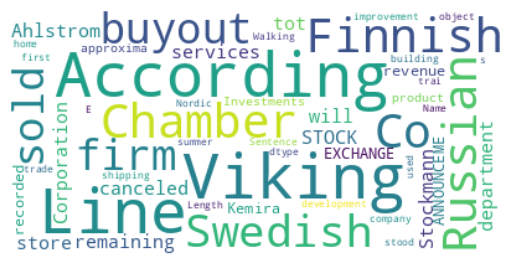

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(data_neutral))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
X[:5]

0    The GeoSolutions technology will leverage Bene...
1    $ESI on lows, down $1.50 to $2.50 BK a real po...
2    For the last quarter of 2010 , Componenta 's n...
3    According to the Finnish-Russian Chamber of Co...
4    The Swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [ ]:
vec = CountVectorizer(stop_words='english')

In [ ]:
X_ = vec.fit_transform(X)

In [ ]:
X_

<5842x11126 sparse matrix of type '<class 'numpy.int64'>'
	with 65768 stored elements in Compressed Sparse Row format>

In [ ]:
#to see the value of above sparse matrix we can use toarray() method
X_.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vec.vocabulary_  #returns dict{words:index in X_}

In [ ]:
#number of key in vec.vocabulary_ = no of unique words
len(vec.vocabulary_ )

11126

In [ ]:
X_.shape

(5842, 11126)

In [ ]:
vec.vocabulary_ ['acted']  #920 position we are getting 'acted' word

920

In [ ]:
vec.vocabulary_ ['netflix']

6882

In [ ]:
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=5)

In [ ]:
y_test[y_test == 'positive'].shape

(472,)

In [ ]:
MNB = MultinomialNB()

In [ ]:
X_train.shape, y_train.shape

((4381, 11126), (4381,))

In [ ]:
MNB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
MNB.score(X_train, y_train)

0.8557406984706688

In [ ]:
MNB.score(X_test, y_test)

0.6878850102669405

In [ ]:
y_pred = MNB.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 81,  86,  51],
       [ 89, 605,  77],
       [ 26, 127, 319]])

In [ ]:
MNB.classes_

array(['negative', 'neutral', 'positive'], dtype='<U8')

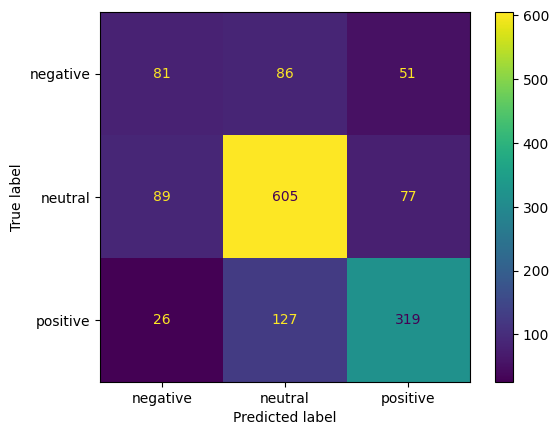

In [ ]:
ConfusionMatrixDisplay(cm, display_labels=MNB.classes_).plot()
plt.show()

In [ ]:
89+77

166

In [ ]:
sample = "The company XYZ did not performm well in the first quarter. It is declining"
sample_tr = vec.transform([sample])
MNB.predict(sample_tr)

array(['neutral'], dtype='<U8')

In [ ]:

sample = "The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys policies"
sample_tr = vec.transform([sample])
MNB.predict(sample_tr)

array(['positive'], dtype='<U8')